<a href="https://colab.research.google.com/github/Ajugu2005/ACCESS-SA-Data-Science-Track/blob/main/CAPSTONE_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, mean_squared_error,
                             mean_absolute_error, r2_score)


DATA UNDERSTANDING AND CLEANING

In [ ]:
#Loading the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head(5)






,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#data inspection
print(data.shape)
print(data.info())
print(data.describe())
print(data.columns)
print(data.dtypes)
print(data.isnull().sum())

(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

In [ ]:
#Handle missing values
print("Missing Values")
print(data.isnull().sum()[data.isnull().sum() > 0])

data['TotalCharges'] = data['TotalCharges'].fillna(0.0)

Missing Values
Series([], dtype: int64)


In [ ]:
import pandas as pd
import numpy as np

# 1. Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# 2. PRE-REQUISITE: Convert TotalCharges to numeric
# Without this step, the outlier detection will fail for TotalCharges
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(0) # Fill NaNs for new customers

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# 3. Identify and treat outliers
print("Identifying Outliers")
for col in numerical_cols:
    # Calculation of IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Number of outliers in {col}: {len(outliers)}")


    data[col] = np.clip(data[col], lower_bound, upper_bound)

print("Outlier treatment complete")
print(data[numerical_cols].describe())

Identifying Outliers
Number of outliers in tenure: 0
Number of outliers in MonthlyCharges: 0
Number of outliers in TotalCharges: 0
Outlier treatment complete
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2279.734304
std      24.559481       30.090047   2266.794470
min       0.000000       18.250000      0.000000
25%       9.000000       35.500000    398.550000
50%      29.000000       70.350000   1394.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [ ]:
#rechecking the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

In [ ]:
#correct datatype

import pandas as pd

# Load the dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

print(data.dtypes)

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


 Exploratory Data Analysis (EDA)

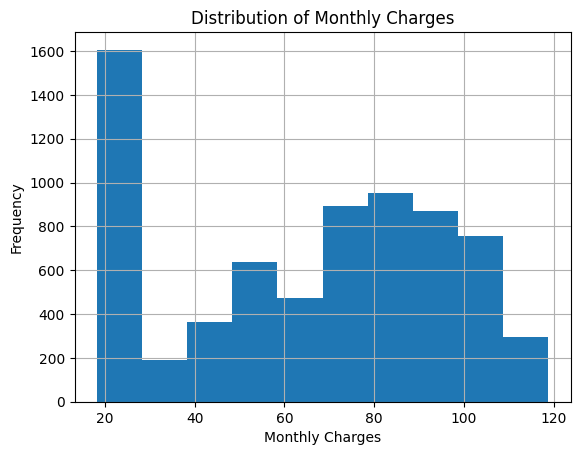

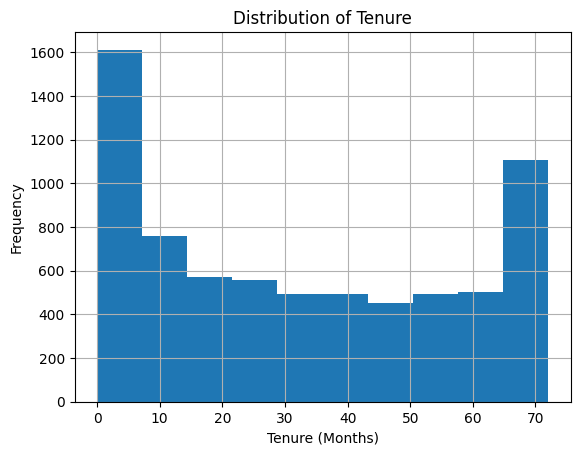

<Figure size 640x480 with 0 Axes>

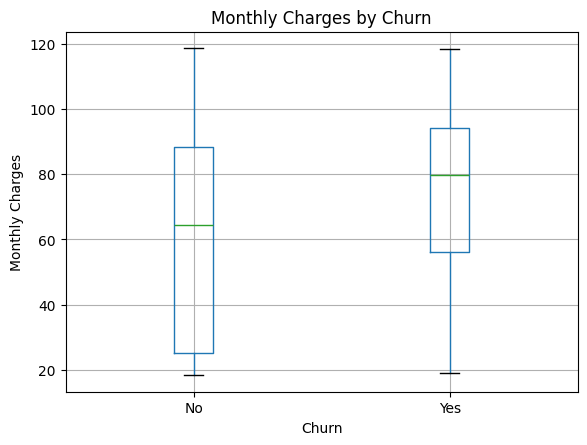

<Figure size 640x480 with 0 Axes>

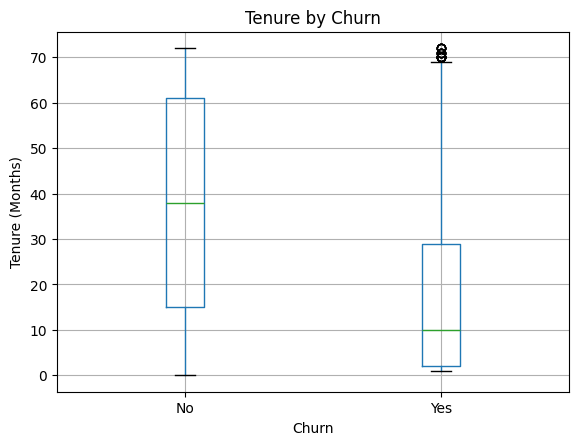

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


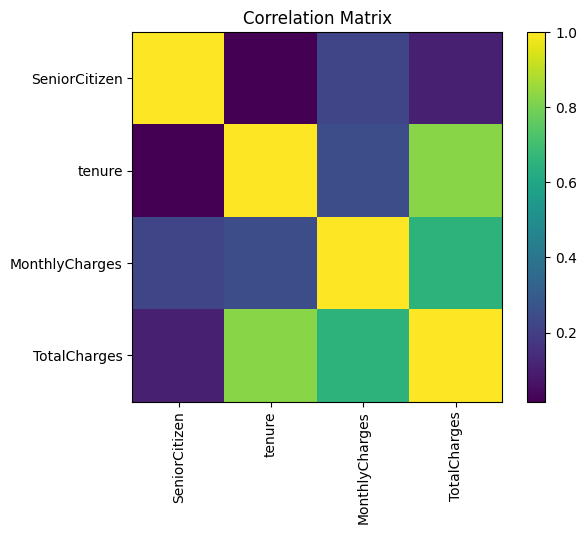

In [ ]:
#Perform univariate and bivarite analysis

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# UNIVARIATE ANALYSIS

# Monthly Charges distribution
plt.figure()
data['MonthlyCharges'].hist()
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

# Tenure distribution
plt.figure()
data['tenure'].hist()
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()


# BIVARIATE ANALYSIS

# Monthly Charges vs Churn
plt.figure()
data.boxplot(column='MonthlyCharges', by='Churn')
plt.title("Monthly Charges by Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

# Tenure vs Churn
plt.figure()
data.boxplot(column='tenure', by='Churn')
plt.title("Tenure by Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Tenure (Months)")
plt.show()


# Select only numeric columns
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation matrix
print(correlation_matrix)

# Plot correlation matrix
plt.figure()
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()




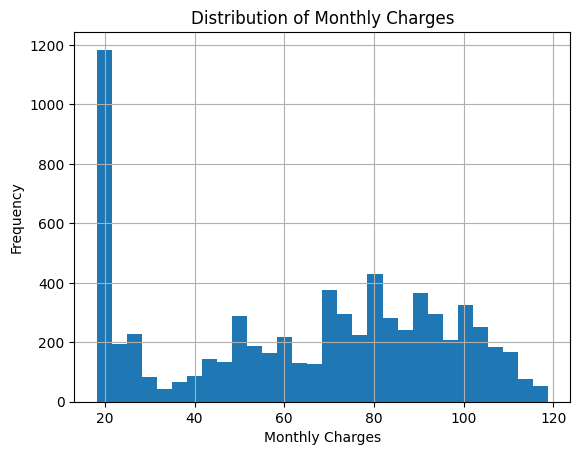

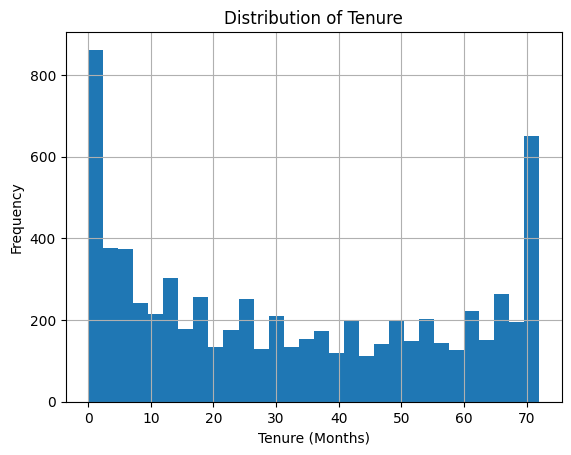

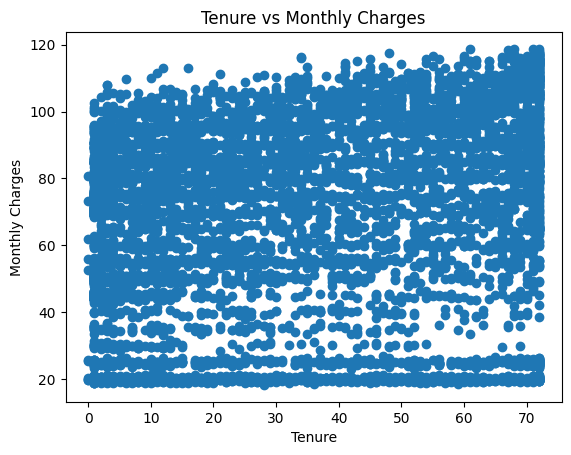

<Figure size 640x480 with 0 Axes>

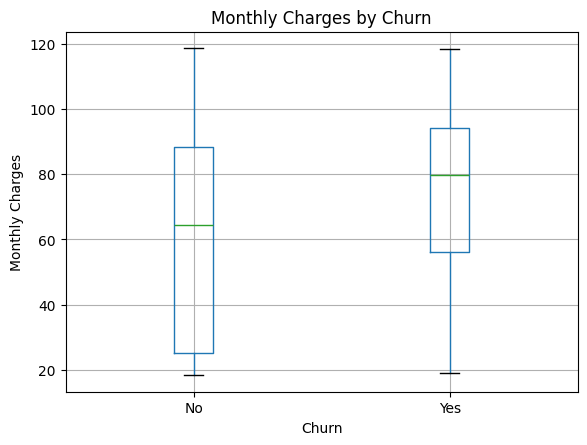

/tmp/ipython-input-492937031.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend = data.groupby('tenure_group')['MonthlyCharges'].mean()


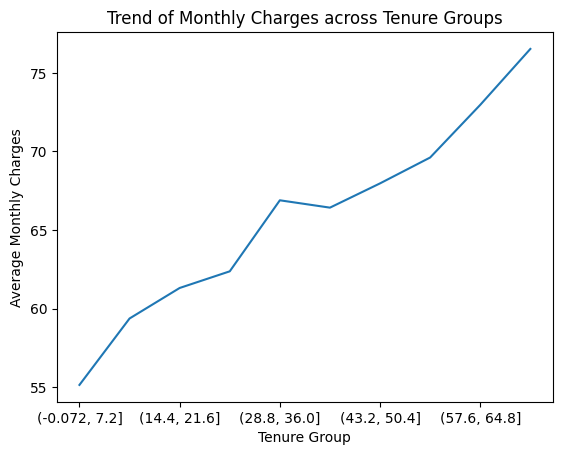

In [ ]:
#Using visualizations to explore:Distributions, Relationships, Patterns and trends

import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# DISTRIBUTIONS

# Monthly Charges Distribution
plt.figure()
data['MonthlyCharges'].hist(bins=30)
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Frequency")
plt.show()

# Tenure Distribution
plt.figure()
data['tenure'].hist(bins=30)
plt.title("Distribution of Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Frequency")
plt.show()

# RELATIONSHIPS

# Tenure vs Monthly Charges
plt.figure()
plt.scatter(data['tenure'], data['MonthlyCharges'])
plt.title("Tenure vs Monthly Charges")
plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")
plt.show()

# Monthly Charges vs Churn
plt.figure()
data.boxplot(column='MonthlyCharges', by='Churn')
plt.title("Monthly Charges by Churn")
plt.suptitle("")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

# PATTERNS & TRENDS

# Create tenure groups
data['tenure_group'] = pd.cut(data['tenure'], bins=10)

# Average Monthly Charges per tenure group
trend = data.groupby('tenure_group')['MonthlyCharges'].mean()

# Plot trend
plt.figure()
trend.plot()
plt.title("Trend of Monthly Charges across Tenure Groups")
plt.xlabel("Tenure Group")
plt.ylabel("Average Monthly Charges")
plt.show()


**3 meaningful insights from the analysis**

Number 1 -
From the bivariate analysis (MonthlyCharges vs Churn): Customers with higher monthly charges are more likely to churn

Churned customers have a much higher average monthly charge than loyal customers.


Number 2 -
From the tenure distribution and Tenure vs Churn:
Most customers who leave do so early

Churned customers stay on average about 18 months

Loyal customers stay over 37 months

The company should focus retention efforts on new customers.

Number 3 -
From the trend plot (Tenure vs MonthlyCharges): Long-term customers are more valuable

Customers with higher tenure tend to have higher average monthly charges

Customer retention is more profitable than acquiring new customers.

**Feature Engineering & Preprocessing**

In [ ]:
#Creating new meaningful features

import pandas as pd
import numpy as np

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Avoid division by zero
data['AvgMonthlySpend'] = data['TotalCharges'] / data['tenure'].replace(0, np.nan)

print(data[['tenure','TotalCharges','AvgMonthlySpend']].head(10))

#Identify categorical & numerical features
# Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
y = data['Churn']
X = data.drop('Churn', axis=1)
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Features:", categorical_features)
print("Numerical Features:", numerical_features)







   tenure  TotalCharges  AvgMonthlySpend
0       1         29.85        29.850000
1      34       1889.50        55.573529
2       2        108.15        54.075000
3      45       1840.75        40.905556
4       2        151.65        75.825000
5       8        820.50       102.562500
6      22       1949.40        88.609091
7      10        301.90        30.190000
8      28       3046.05       108.787500
9      62       3487.95        56.257258
Categorical Features: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Numerical Features: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'AvgMonthlySpend'],
      dtype='object')


In [ ]:
#creating pipelines for encoding & scaling

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

X_processed = preprocessor.fit_transform(X)
print(X_processed)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 102307 stored elements and shape (7043, 7073)>
  Coords	Values
  (0, 0)	-0.43991649313097614
  (0, 1)	-1.2774445836787656
  (0, 2)	-1.1603229160349193
  (0, 3)	-0.9941940877241975
  (0, 4)	-1.1578889425733963
  (0, 5379)	1.0
  (0, 7048)	1.0
  (0, 7051)	1.0
  (0, 7058)	1.0
  (0, 7069)	1.0
  (0, 7071)	1.0
  (1, 0)	-0.43991649313097614
  (1, 1)	0.06632741908223598
  (1, 2)	-0.2596289419448806
  (1, 3)	-0.17373981825040702
  (1, 4)	-0.30565771102922806
  (1, 3966)	1.0
  (1, 7047)	1.0
  (1, 7050)	1.0
  (1, 7056)	1.0
  (1, 7060)	1.0
  (1, 7067)	1.0
  (1, 7072)	1.0
  (2, 0)	-0.43991649313097614
  (2, 1)	-1.2367242199587352
  :	:
  (7041, 4)	0.392614528308242
  (7041, 5938)	1.0
  (7041, 7047)	1.0
  (7041, 7048)	1.0
  (7041, 7050)	1.0
  (7041, 7052)	1.0
  (7041, 7053)	1.0
  (7041, 7069)	1.0
  (7041, 7072)	1.0
  (7042, 0)	-0.43991649313097614
  (7042, 1)	1.369379058123207
  (7042, 2)	1.3589613362169235
  (7042, 3)	2.012344071321626
  

**MODEL BUILDING (SUPERVISED LEARNING) and MODEL INTERPRETATION**  

In [ ]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
#targeting the total charges and churn dataset
# Regression target
y_reg = data['TotalCharges']
X_reg = data.drop(['TotalCharges','Churn'], axis=1)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)



In [18]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

X = data.drop(columns=["MonthlyCharges"])
y = data["MonthlyCharges"]


X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Model 1 - linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_lr = linear_model.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)
print("R²:", r2_lr)


#Model 2 - random forest

rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regressor")
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("R²:", r2_rf)

# compare both models

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [mse_lr, mse_rf],
    "R2 Score": [r2_lr, r2_rf]
})

print(results)







Linear Regression
MSE: 1.1055822811241387
RMSE: 1.0514667284912722
R²: 0.9987788676057939
Random Forest Regressor
MSE: 1.567140209190912
RMSE: 1.2518547077001037
R²: 0.9982690698753238
               Model       MSE  R2 Score
0  Linear Regression  1.105582  0.998779
1      Random Forest  1.567140  0.998269


In [27]:
# Classification task

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Fix TotalCharges column (stored as string)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data = data.dropna()

# Encode target variable
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

# Split features and target
X = data.drop(columns=["Churn"])
y = data["Churn"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression (Baseline Model)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

acc_log = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
roc_log = roc_auc_score(y_test, y_prob_log)

print("Logistic Regression")
print("Accuracy:", acc_log)
print("Precision:", prec_log)
print("Recall:", rec_log)
print("F1-score:", f1_log)
print("ROC-AUC:", roc_log)
print()

# Random Forest (Advanced Model)
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_rf = roc_auc_score(y_test, y_prob_rf)

print("Random Forest Classifier")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", rec_rf)
print("F1-score:", f1_rf)
print("ROC-AUC:", roc_rf)
print()

# Model comparison
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [acc_log, acc_rf],
    "Precision": [prec_log, prec_rf],
    "Recall": [rec_log, rec_rf],
    "F1-score": [f1_log, f1_rf],
    "ROC-AUC": [roc_log, roc_rf]
})

print(results)




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Accuracy: 0.7896233120113717
Precision: 0.6160714285714286
Recall: 0.553475935828877
F1-score: 0.5830985915492958
ROC-AUC: 0.8307522868339452

Random Forest Classifier
Accuracy: 0.7945984363894811
Precision: 0.660377358490566
Recall: 0.4679144385026738
F1-score: 0.5477308294209703
ROC-AUC: 0.8258136573295164

                 Model  Accuracy  Precision    Recall  F1-score   ROC-AUC
0  Logistic Regression  0.789623   0.616071  0.553476  0.583099  0.830752
1        Random Forest  0.794598   0.660377  0.467914  0.547731  0.825814


In [28]:
#Cross-validation

# Classification task with Cross-Validation

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Fix TotalCharges
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data = data.dropna()

# Encode target
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

X = data.drop(columns=["Churn"])
y = data["Churn"]

# Encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# MODELS

log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# CROSS-VALIDATION (ROC-AUC)

cv_log = cross_val_score(log_model, X_train, y_train, cv=5, scoring="roc_auc")
cv_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring="roc_auc")

# Fit models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# EVALUATION METRICS

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest"],
    "CV ROC-AUC (Mean)": [cv_log.mean(), cv_rf.mean()],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_rf)
    ]
})

print(results)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

                 Model  CV ROC-AUC (Mean)  Accuracy  Precision    Recall  \
0  Logistic Regression           0.840527  0.789623   0.616071  0.553476   
1        Random Forest           0.834645  0.794598   0.660377  0.467914   

   F1-score   ROC-AUC  
0  0.583099  0.830752  
1  0.547731  0.825814  


**MODEL INTERPRETATION**

Features Influencing the Predictions

The models identified several features as key drivers of customer churn.

**Tenure**

Tenure had a strong negative influence on churn. Customers who had been with the company longer were much less likely to churn, while newer customers showed higher churn risk.
I.e. Customer loyalty increases over time.

**Contract Type**

Contract type was one of the most influential predictors. Customers on month-to-month contracts were significantly more likely to churn than those on one-year or two-year contracts.
I.e. Long-term contracts improve customer retention.

**Monthly Charges**

Higher monthly charges increased the likelihood of churn.
I.e. Customers are more likely to leave when they feel the service is expensive relative to its value.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Top Logistic Regression Coefficients:
                          Feature  Coefficient
7056            Contract_Two year    -3.221160
7041  InternetService_Fiber optic     0.752859
4474        customerID_6323-AYBRX     0.693282
411         customerID_0607-DAAHE     0.693016
2450        customerID_3512-IZIKN     0.690935
711         customerID_1043-YCUTE     0.690155
4624        customerID_6532-YLWSI     0.690051
6086        customerID_8631-NBHFZ     0.689207
5222        customerID_7359-SSBJK     0.687310
6047        customerID_8580-QVLOC     0.687252

Top Random Forest Feature Importance:
                             Feature  Importance
3                       TotalCharges    0.103251
1                             tenure    0.095547
2                     MonthlyCharges    0.081871
7041     InternetService_Fiber optic    0.027049
7056               Contract_Two year    0.026796
7059  PaymentMethod_Electronic check    0.023906
7044              OnlineSecurity_Yes    0.020915
7050         

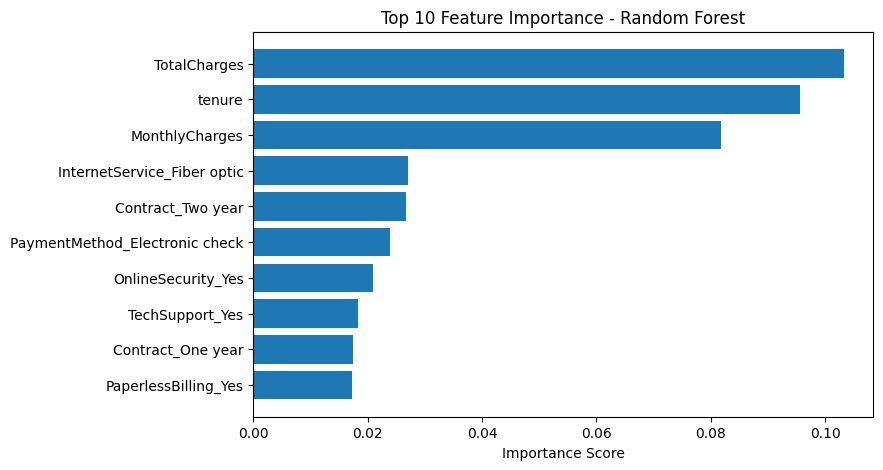

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Fix TotalCharges column
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data = data.dropna()

# Encode target
data["Churn"] = data["Churn"].map({"Yes": 1, "No": 0})

# Features and target
X = data.drop(columns=["Churn"])
y = data["Churn"]

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================
# TRAIN MODELS
# =====================

# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# =====================
# LOGISTIC REGRESSION COEFFICIENTS
# =====================

coefficients = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": log_model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print("\nTop Logistic Regression Coefficients:")
print(coefficients.head(10))

# =====================
# RANDOM FOREST FEATURE IMPORTANCE
# =====================

importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nTop Random Forest Feature Importance:")
print(importance.head(10))


plt.figure(figsize=(8,5))
plt.barh(importance.head(10)["Feature"], importance.head(10)["Importance"])
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()


**Coefficients (Linear Models):**

Coefficients show the direction and strength of each feature’s influence on the prediction. Positive coefficients increase the likelihood of the target outcome, while negative coefficients reduce it. Features with larger absolute coefficients have a stronger impact on the model’s predictions.

**Feature Importance (Tree-Based Models):**

Feature importance measures how much each feature contributes to decision-making across all trees. Higher importance scores indicate features that are more influential in splitting data and improving model accuracy.

**Model’s behavior in a business or real-world context**

The model reveals that customers are most likely to churn when they are new, on flexible contracts, and paying higher monthly fees. This means the business should focus on onboarding support for new customers, encourage long-term contracts, and review pricing strategies for high-cost users. By acting on these insights, the company can reduce churn, improve customer satisfaction, and increase long-term revenue.